In [1]:
import pandas as pd
import numpy as np

In [2]:
danawa_data =pd.read_excel('./my_files/2_danawa_data_final_class.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055310,60,210
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,578480,60,210
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60,210
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,804800,60,210
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60,200


In [4]:
top_list = danawa_data.sort_values(["사용시간","흡입력"], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
257,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270
120,핸디/스틱청소기,모온,오비큠 플러스,269000,80,250
118,핸디/스틱청소기,샤오미,드리미 T20,379000,70,250


In [5]:
# 예제 7-38 평균값 정리
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 377455.37593984965
흡입력 평균값 167.89473684210526
사용시간 평균값 43.54135338345865


In [7]:
# 예제 7-39 가성비 좋은 제품 탐색
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data.head(10)

,카테고리,회사명,제품,가격,사용시간,흡입력
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60,200
5,핸디/스틱청소기,샤오미,드리미 V10,155700,60,220
7,핸디/스틱청소기,일렉트로룩스,WELL Q6 WQ61-1OGG,125870,45,210
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70,220
17,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48,290
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
24,핸디/스틱청소기,DIBEA,M24 MAX,139000,50,250
31,핸디/스틱청소기,일렉트로룩스,퓨어 Q9 파워프로 PQ92-3OBF,276250,53,210
36,핸디/스틱청소기,샤오미,드리미 V11SE,180430,60,240


### 데이터 시각화

In [8]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 

rc('font', family = 'Malgun Gothic')

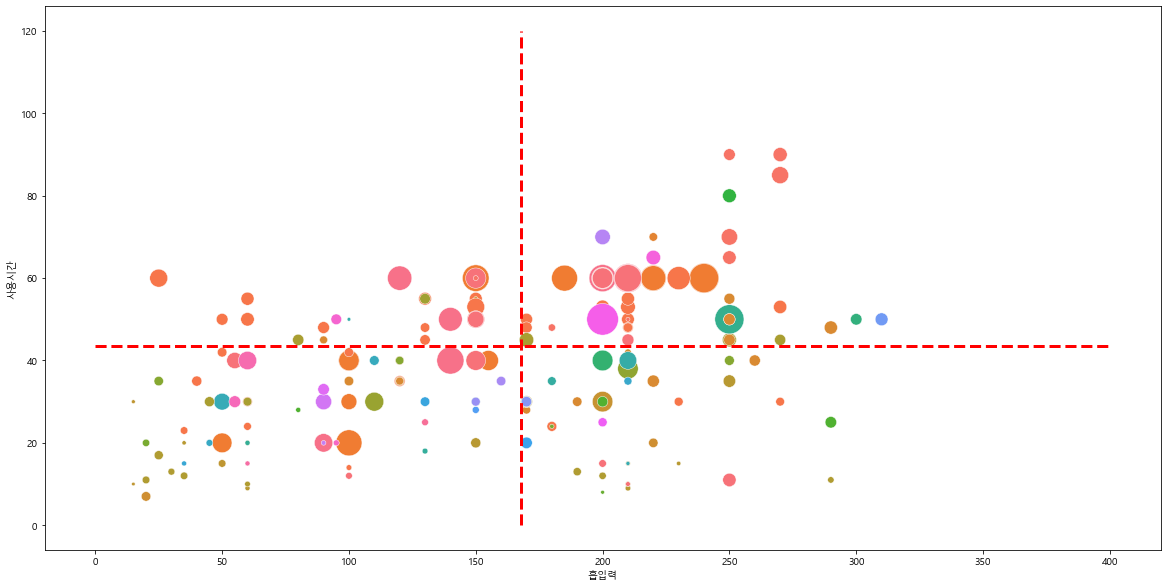

In [16]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x= '흡입력', y = '사용시간',
               size = '가격', hue = danawa_data['회사명'],
               data = danawa_data, legend=False,
               sizes = (10,1000))
plt.hlines(use_time_mean_value, 0, 400, color = 'red',
          linestyles= 'dashed', linewidth=3)
plt.vlines(suction_mean_value, 0, 120, color = 'red',
          linestyles= 'dashed', linewidth=3)
plt.show()

In [19]:
chart_data = danawa_data.dropna(axis = 0)
len(chart_data)

266

In [20]:
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

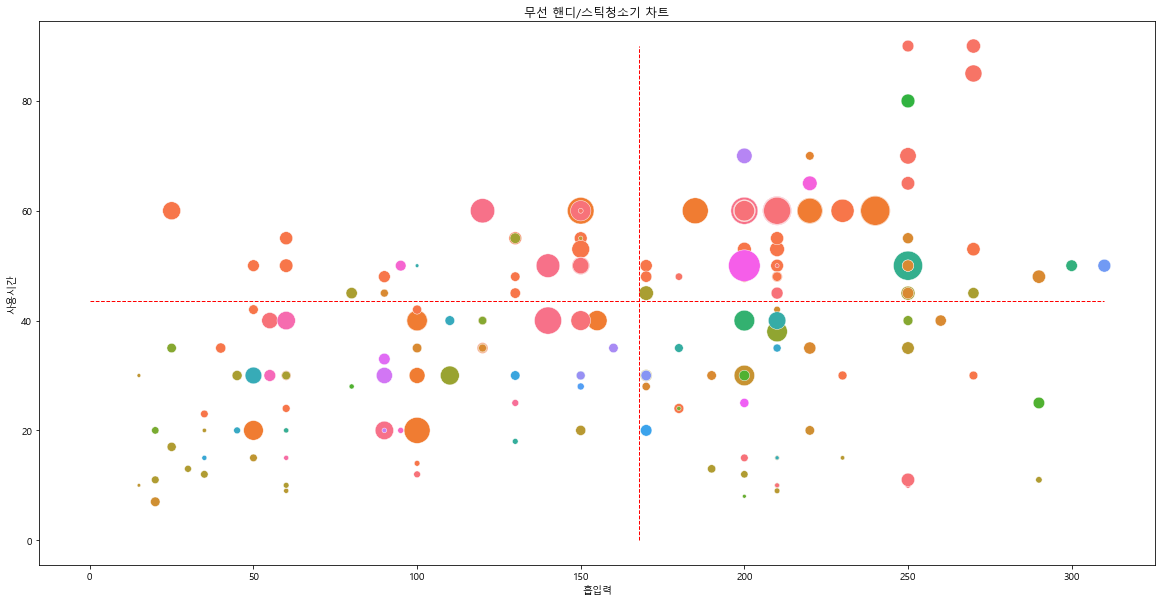

In [21]:
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], 
             data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [0, use_time_max_value], 
          'r--', 
          lw = 1 )
plt.show()

In [22]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

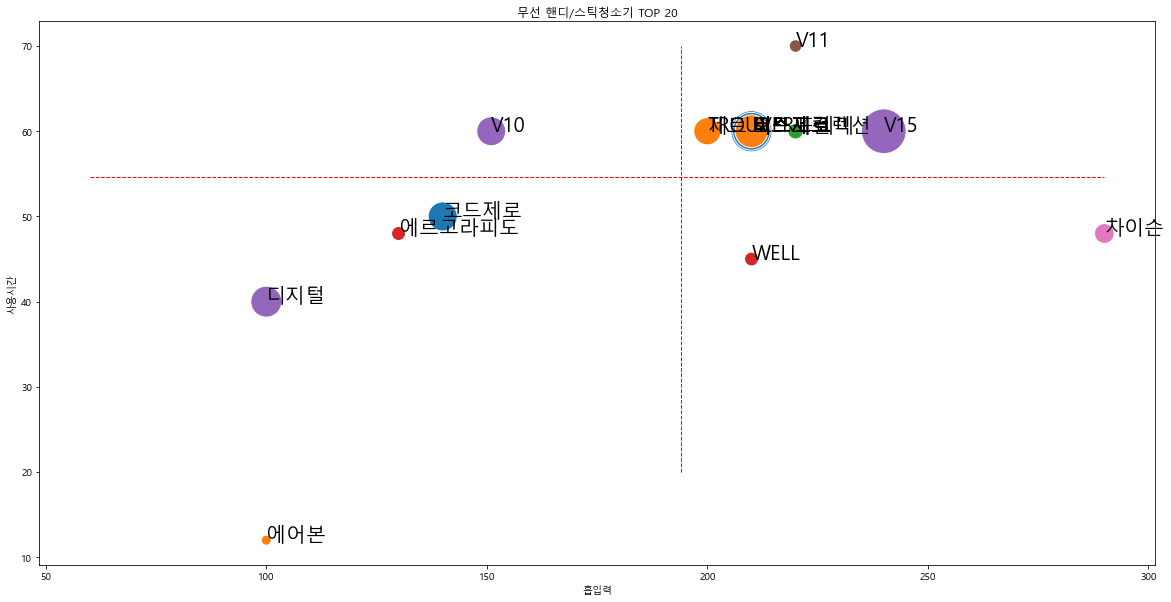

In [23]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', 
                  y = '사용시간', 
                  size = '가격', 
                  hue = chart_data_selected['회사명'], 
                  data = chart_data_selected, sizes = (100, 2000),
                  legend = False)
plt.plot([60, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [20, use_time_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
plt.show()